<a href="https://colab.research.google.com/github/Swapnil-Giram/Clustring/blob/main/migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About The data

Data showing the movement of LinkedIn members across the world at the country, industry, and skill level.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

### Loding Data

In [96]:
data = '/content/drive/MyDrive/skill_migration_public.csv'

In [97]:
df = pd.read_csv(data)

In [98]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

### Data Cleaning

In [99]:
# droping the unnamed columns
df.drop(['Unnamed: 12','Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],axis=1,inplace=True)

In [100]:
df.head()

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  
0           -705.88           -550.04           -680.92          -1208.79  
1           -933.55           -776.06           -532.22           -790.09  
2           -769.68           -756.59           -600.44           -767.64  
3           -828.54           -964.73           -406.50           -739.51  
4           -841.17           -842.32           -581.71           -718.64

In [101]:
df.isna().sum() # cheacking a null values

country_code            3030
country_name            3030
wb_income               3030
wb_region               3030
skill_group_id          3030
skill_group_category    3030
skill_group_name        3030
net_per_10K_2015        3030
net_per_10K_2016        3030
net_per_10K_2017        3030
net_per_10K_2018        3030
net_per_10K_2019        3030
dtype: int64

In [102]:
# droping the null values
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_id          0
skill_group_category    0
skill_group_name        0
net_per_10K_2015        0
net_per_10K_2016        0
net_per_10K_2017        0
net_per_10K_2018        0
net_per_10K_2019        0
dtype: int64

In [104]:
df.nunique()

country_code              140
country_name              140
wb_income                   4
wb_region                   7
skill_group_id            249
skill_group_category        5
skill_group_name          249
net_per_10K_2015        15023
net_per_10K_2016        14958
net_per_10K_2017        14863
net_per_10K_2018        14925
net_per_10K_2019        14887
dtype: int64

In [105]:
for column in df.columns:
  print('---------------------------')
  print(df[column].value_counts())

---------------------------
country_code
us    249
gb    249
ca    245
au    244
fr    241
     ... 
ye     34
ga     33
bf     27
bj     23
tg     17
Name: count, Length: 140, dtype: int64
---------------------------
country_name
United States     249
United Kingdom    249
Canada            245
Australia         244
France            241
                 ... 
Yemen, Rep.        34
Gabon              33
Burkina Faso       27
Benin              23
Togo               17
Name: count, Length: 140, dtype: int64
---------------------------
wb_income
High income            8904
Upper middle income    4335
Lower middle income    3240
Low income             1138
Name: count, dtype: int64
---------------------------
wb_region
Europe & Central Asia         6222
East Asia & Pacific           2872
Middle East & North Africa    2659
Latin America & Caribbean     2502
Sub-Saharan Africa            1993
South Asia                     875
North America                  494
Name: count, dtype: int64
---

In Dataset,


1. there are 140 unique countries
2. in Wb_income column 5 types of income group
3. in wb_region 7 types of regions
4. in skill_group_category 5 diffrent categories
5. in skill_group_name 249 diffrent skills





In [106]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019'],
      dtype='object')

In [107]:
# make a column with the average value of the people between 2015 and 2019.
df["avg_net_per_10k"] = df[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019']].mean(axis=1)
df.head()

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  \
0           -705.88           -550.04           -680.92          -1208.79   
1           -933.55           -776.06           -532.22           -790.09   
2           -769.68           -756.59           -600.44           -767.64   
3           -828.54           -964.73           -406.50           -739.51   
4           -841.17           -842.32           -581.71           -718.64   

   avg_net_per_10k  
0         -787.444  
1         -928.434  
2         -925.160  
3         -779.356  
4         -898.910

In [108]:
a = lambda x: 'Outflow' if x < 0 else 'Inflow'
df['country_net_per_10k'] = df.groupby('country_name')['avg_net_per_10k'].transform('mean')
df['Status'] = df['country_net_per_10k'].apply(a)
df.head()

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  \
0           -705.88           -550.04           -680.92          -1208.79   
1           -933.55           -776.06           -532.22           -790.09   
2           -769.68           -756.59           -600.44           -767.64   
3           -828.54           -964.73           -406.50           -739.51   
4           -841.17           -842.32           -581.71           -718.64   

   avg_net_per_10k  country_net_per_10k   Status  
0         -787.444          -454.164463  Outflow  
1         -928.434          -454.164463  Outflow  
2         -925.160          -454.164463  Outflow  
3         -779.356          -454.164463  Outflow  
4         -898.910          -454.164463  Outflow

In [109]:
# creating a new column to check the outflow and inflow of people in the country
a = lambda x: 'Outflow' if x < 0 else 'Inflow'
df['outflow_inflow_per_skill'] = df['avg_net_per_10k'].apply(a)
df.head()

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  \
0           -705.88           -550.04           -680.92          -1208.79   
1           -933.55           -776.06           -532.22           -790.09   
2           -769.68           -756.59           -600.44           -767.64   
3           -828.54           -964.73           -406.50           -739.51   
4           -841.17           -842.32           -581.71           -718.64   

   avg_net_per_10k  country_net_per_10k   Status outflow_inflow_per_skill  
0         -787.444          -454.164463  Outflow                  Outflow  
1         -928.434          -454.164463  Outflow                  Outflow  
2         -925.160          -454.164463  Outflow                  Outflow  
3         -779.356          -454.164463  Outflow                  Outflow  
4         -898.910          -454.164463  Outflow                  Outflow

In East Asia & Pacific            

### Data visualisation on Region and Income

False


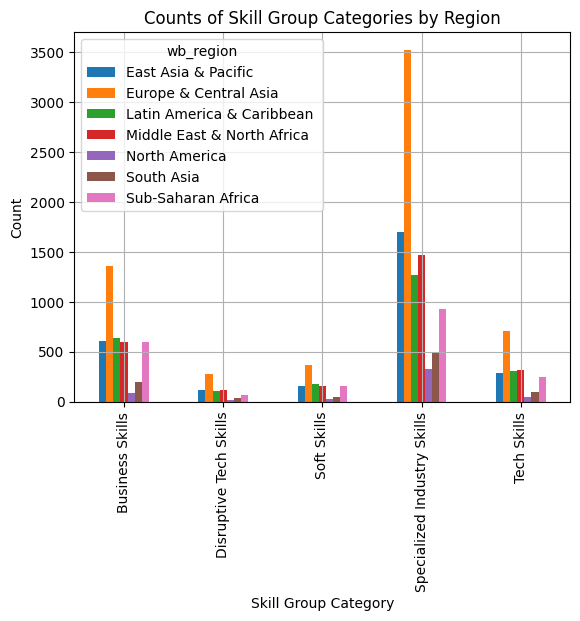

In [110]:
# plotting a skils count by Region
print('count' in df.columns)
bar_data = df.pivot_table(index='skill_group_category', columns='wb_region', values='country_code', aggfunc='count').fillna(0)
bar_data.plot(kind='bar')
plt.title('Counts of Skill Group Categories by Region')
plt.xlabel('Skill Group Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

wb_region
East Asia & Pacific            18.477263
Europe & Central Asia          14.488442
Latin America & Caribbean    -139.446722
Middle East & North Africa    -70.041193
North America                  43.347304
South Asia                   -189.181159
Sub-Saharan Africa            -48.262520
Name: avg_net_per_10k, dtype: float64


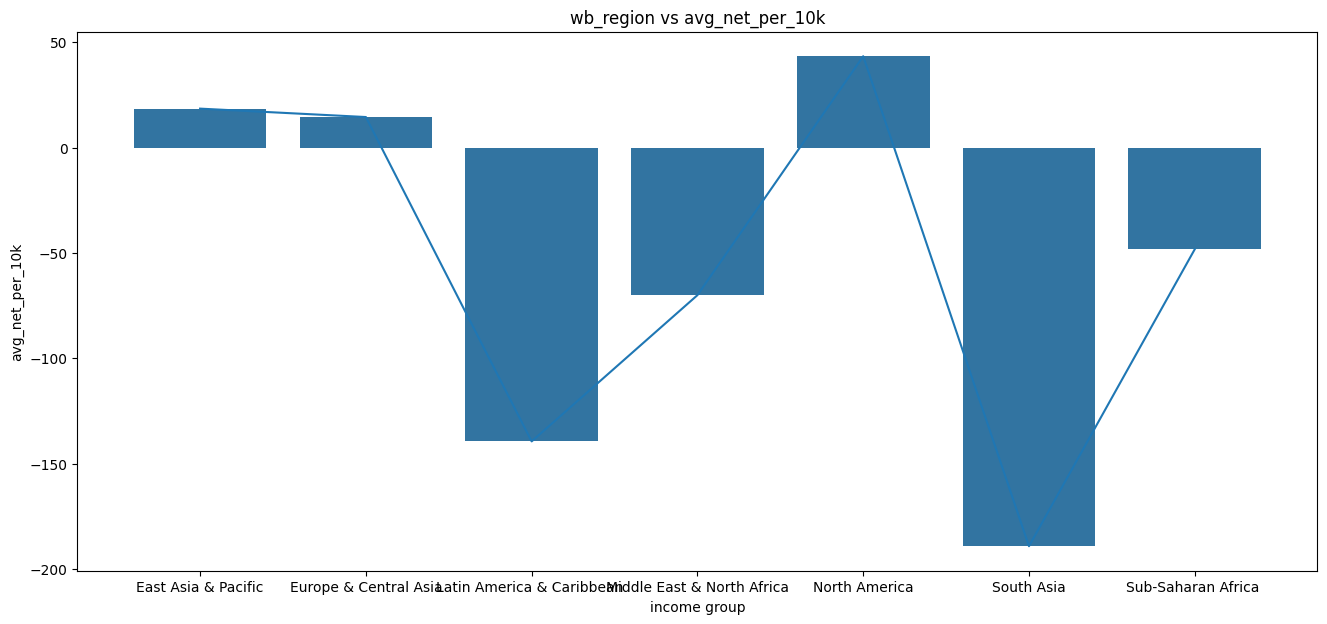

In [111]:
# monitoring the migration of people on diffrent regions
a = df.groupby("wb_region")["avg_net_per_10k"].mean()
print(a)
plt.figure(figsize=(16,7))
sns.barplot(x=a.index, y=a.values)
plt.plot(a)
plt.title("wb_region vs avg_net_per_10k")
plt.xlabel('income group')
plt.ylabel('avg_net_per_10k')
plt.show()

wb_income
High income             58.440723
Low income            -135.617297
Lower middle income   -104.727988
Upper middle income   -152.003144
Name: avg_net_per_10k, dtype: float64


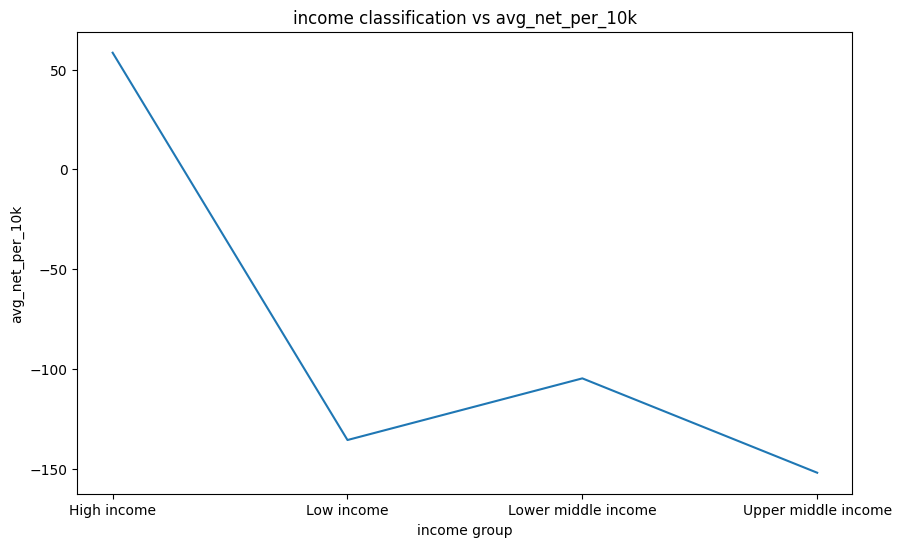

In [112]:
# monitoring the migration of people from diffrent income categories
a = df.groupby("wb_income")["avg_net_per_10k"].mean()
print(a)
plt.figure(figsize=(10,6))
plt.plot(a)
plt.title("income classification vs avg_net_per_10k")
plt.xlabel('income group')
plt.ylabel('avg_net_per_10k')
plt.show()

In [113]:
# Identifying high-income nations where skilled individuals relocate
a = df[df["wb_income"] == "High income"]['country_name']
a.unique()

array(['Argentina', 'Australia', 'Austria', 'Bahamas, The', 'Bahrain',
       'Belgium', 'Canada', 'Chile', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong SAR, China', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan, China', 'Trinidad and Tobago', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

<ipython-input-114-909133e0032b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_net_per_10k_region.sort_values(by=['country_name', 'skill_group_category'], inplace=True)


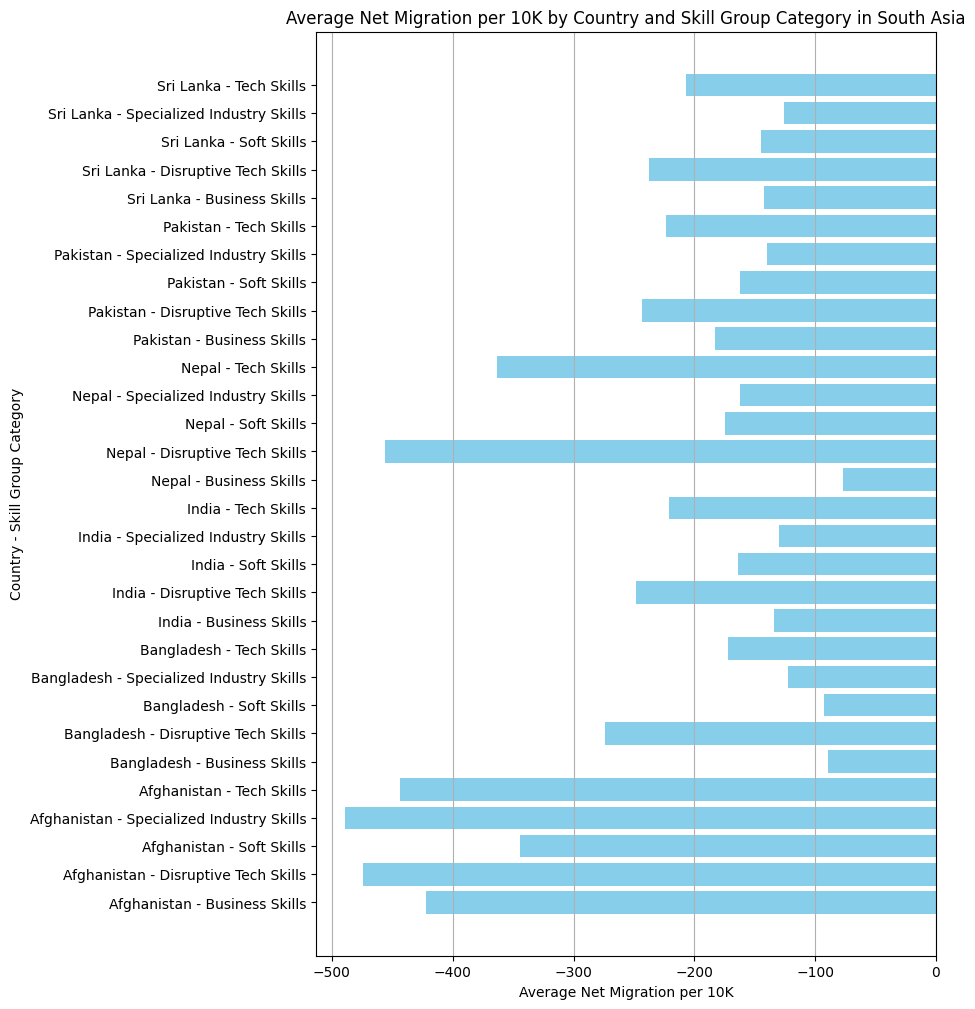

In [114]:
# Plotting skill category by region and country.
grouped = df.groupby(['country_name', 'skill_group_category', 'wb_region'])['avg_net_per_10k'].mean().reset_index()

# Filter by specific region (e.g.,'South Asia')
specific_region = 'South Asia'
avg_net_per_10k_region = grouped[grouped['wb_region'] == specific_region]

avg_net_per_10k_region.sort_values(by=['country_name', 'skill_group_category'], inplace=True)

# Plotting
plt.figure(figsize=(8, 12))

plt.barh(avg_net_per_10k_region['country_name'] + ' - ' + avg_net_per_10k_region['skill_group_category'],
         avg_net_per_10k_region['avg_net_per_10k'],
         color='skyblue')

plt.xlabel('Average Net Migration per 10K')
plt.ylabel('Country - Skill Group Category')
plt.title(f'Average Net Migration per 10K by Country and Skill Group Category in {specific_region}')
plt.grid(axis='x')

plt.show()

<ipython-input-115-37f4ca2c375d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_net_per_10k_region.sort_values(by=['country_name', 'skill_group_category'], inplace=True)


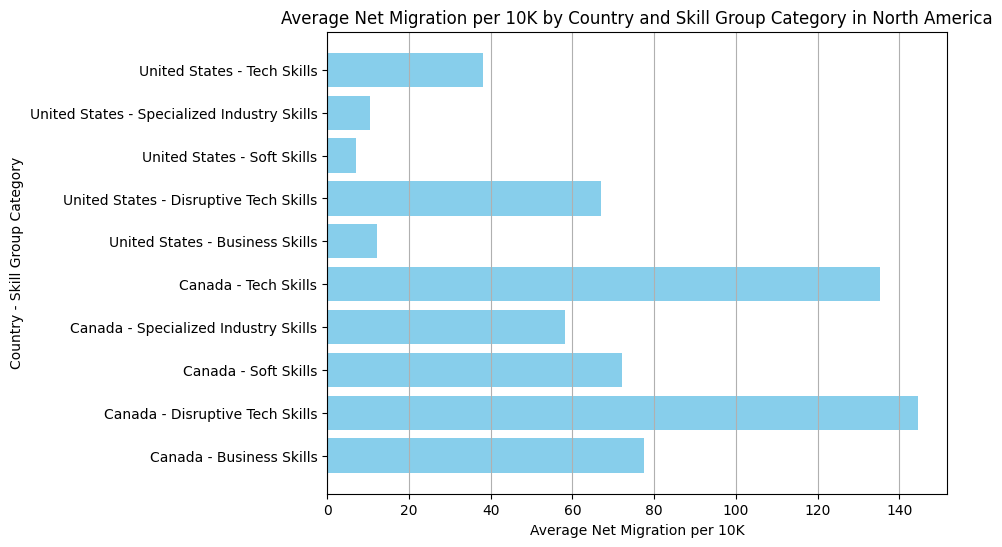

In [115]:
# Plotting skill category by region and country.
grouped = df.groupby(['wb_region','country_name', 'skill_group_category'])['avg_net_per_10k'].mean().reset_index()

# Filter by specific region (e.g.,'North America')
specific_region = 'North America'
avg_net_per_10k_region = grouped[grouped['wb_region'] == specific_region]

avg_net_per_10k_region.sort_values(by=['country_name', 'skill_group_category'], inplace=True)

# Plotting
plt.figure(figsize=(8, 6))

plt.barh(avg_net_per_10k_region['country_name'] + ' - ' + avg_net_per_10k_region['skill_group_category'],
         avg_net_per_10k_region['avg_net_per_10k'],
         color='skyblue')

plt.xlabel('Average Net Migration per 10K')
plt.ylabel('Country - Skill Group Category')
plt.title(f'Average Net Migration per 10K by Country and Skill Group Category in {specific_region}')
plt.grid(axis='x')

plt.show()

### Country-based data visualization

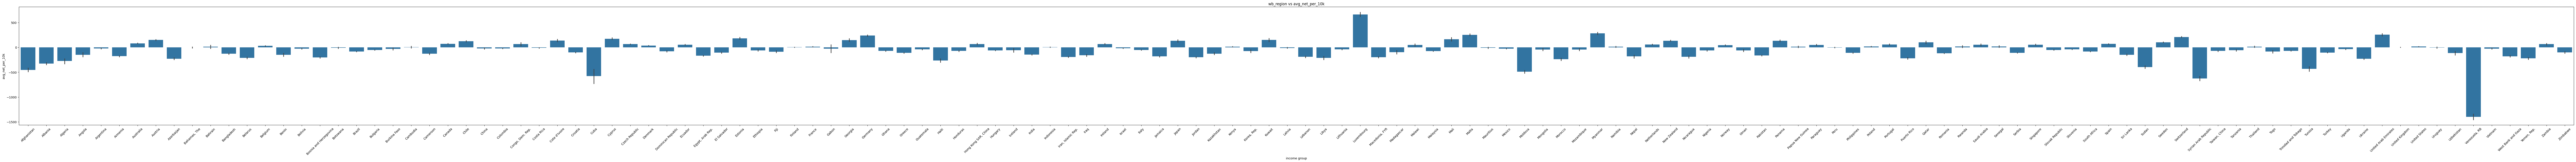

In [116]:
# checking outflow inflow of people in all countries
a = df.groupby('country_name')['avg_net_per_10k'].mean()
plt.figure(figsize=(150,7))
sns.barplot(y=df['avg_net_per_10k'],x=df['country_name'])
plt.title("wb_region vs avg_net_per_10k")
plt.xlabel('income group')
plt.xticks(rotation=45)
plt.ylabel('avg_net_per_10k')
plt.show()

<ipython-input-117-f4cbf622eb43>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.values, y=skill, palette='viridis')


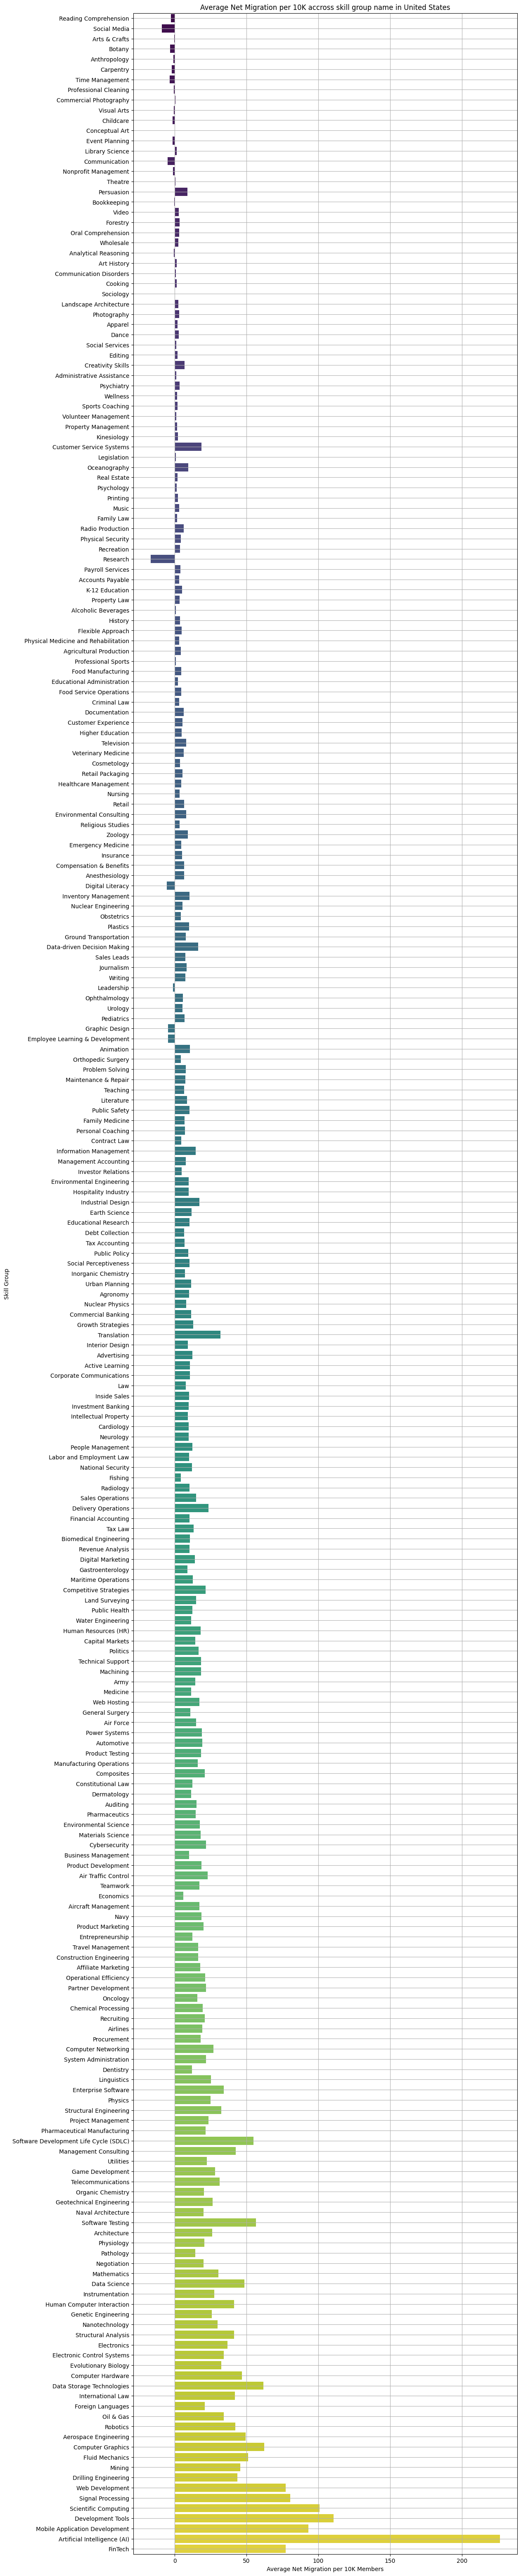

In [117]:
# ploting the average immigration and net migration in the US for each skill group.

year = 'avg_net_per_10k'
country = 'United States'
year_data = df[df['country_name']==country][year]
skill = df[df['country_name']==country]['skill_group_name']

plt.figure(figsize=(12, 80))
sns.barplot(x=year_data.values, y=skill, palette='viridis')
plt.title(f'Average Net Migration per 10K accross skill group name in {country}' )
plt.xlabel('Average Net Migration per 10K Members')
plt.ylabel('Skill Group')
plt.grid(True)
plt.show()


<ipython-input-118-797cd437dcd3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.values, y=skill, palette='viridis')


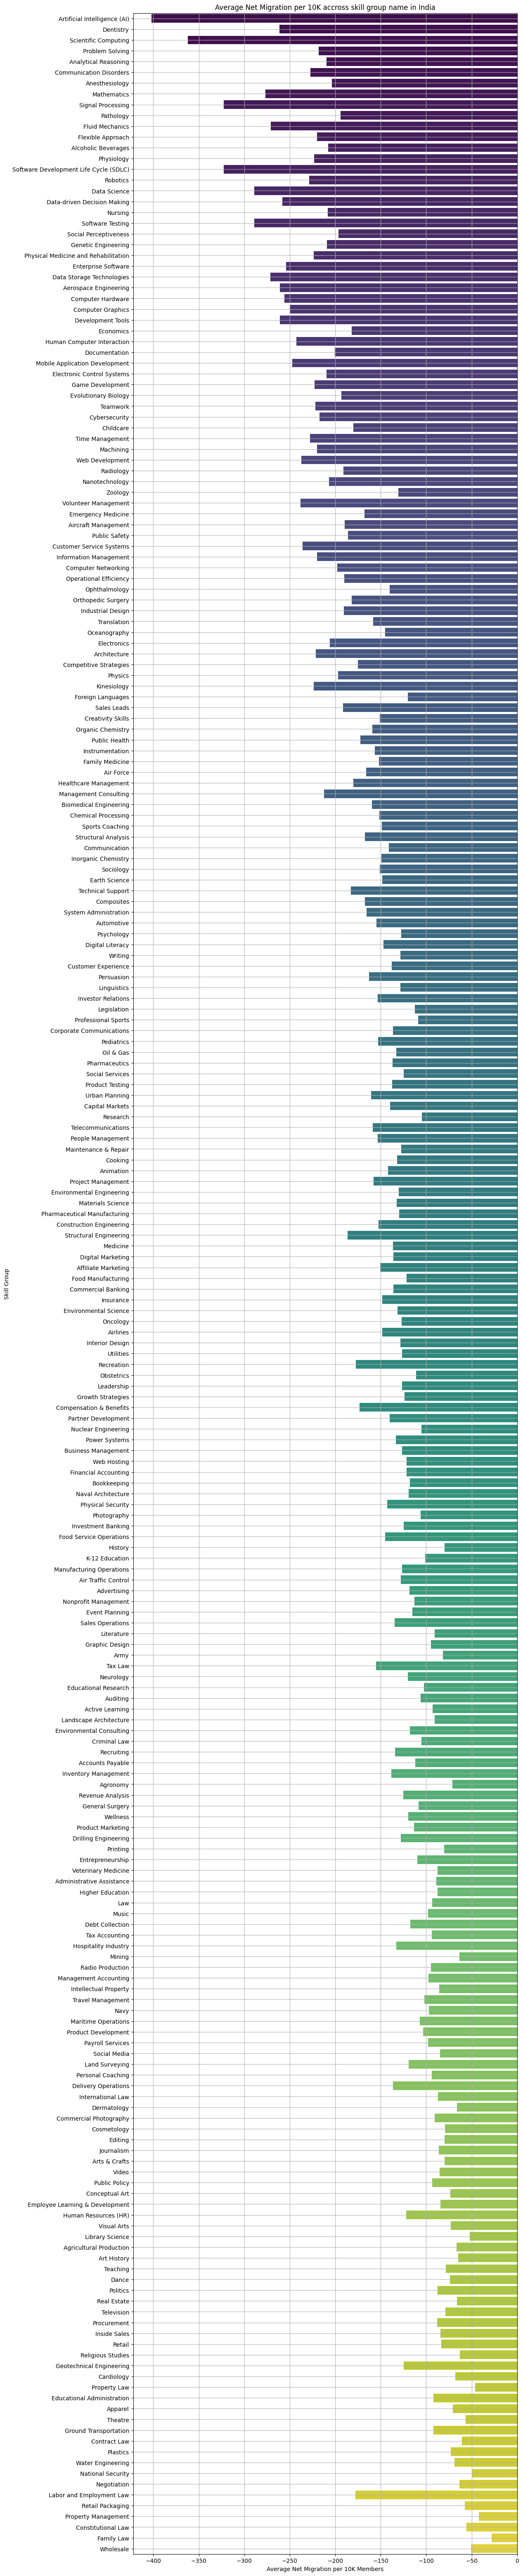

In [118]:
# Determine the average immigration and net migration in the india for each skill group.
year = 'avg_net_per_10k'
country = 'India'
year_data = df[df['country_name']==country][year]
skill = df[df['country_name']==country]['skill_group_name']

plt.figure(figsize=(12, 80))
sns.barplot(x=year_data.values, y=skill, palette='viridis')
plt.title(f'Average Net Migration per 10K accross skill group name in {country}' )
plt.xlabel('Average Net Migration per 10K Members')
plt.ylabel('Skill Group')
plt.grid(True)
plt.show()


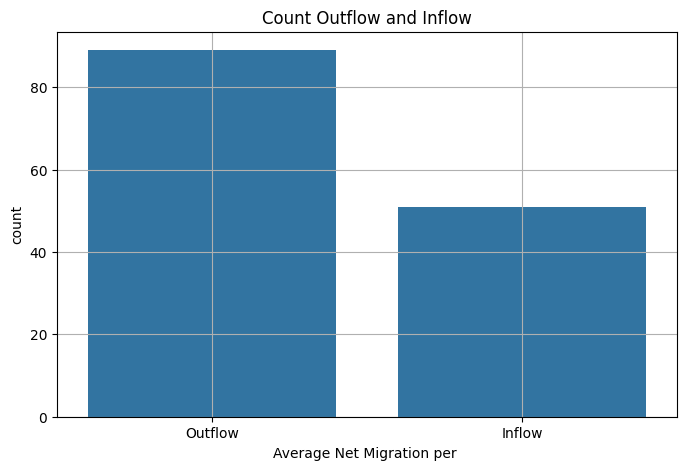

In [119]:
# Plotting 140 Countries Status
plt.figure(figsize=(8,5))
sns.countplot(x=df.groupby('country_name')['Status'].max())
plt.title('Count Outflow and Inflow' )
plt.xlabel('Average Net Migration per ')
plt.ylabel('count')
plt.grid(True)
plt.show()

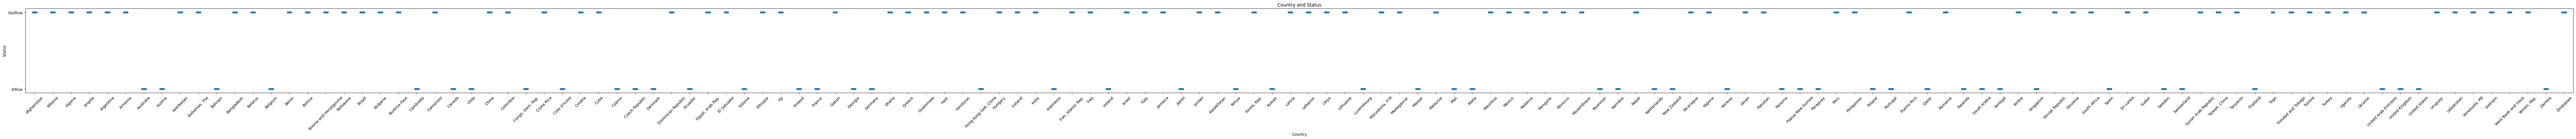

In [120]:
# ploting each country  Status
grouped_data = df.groupby(['country_name', 'Status']).size().unstack(fill_value=0)

plt.figure(figsize=(120, 4))
sns.stripplot(x='country_name', y='Status', data=df, jitter=True)
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Status')
plt.title('Country and Status')

plt.show()

In [121]:
df.head(5)

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  \
0           -705.88           -550.04           -680.92          -1208.79   
1           -933.55           -776.06           -532.22           -790.09   
2           -769.68           -756.59           -600.44           -767.64   
3           -828.54           -964.73           -406.50           -739.51   
4           -841.17           -842.32           -581.71           -718.64   

   avg_net_per_10k  country_net_per_10k   Status outflow_inflow_per_skill  
0         -787.444          -454.164463  Outflow                  Outflow  
1         -928.434          -454.164463  Outflow                  Outflow  
2         -925.160          -454.164463  Outflow                  Outflow  
3         -779.356          -454.164463  Outflow                  Outflow  
4         -898.910          -454.164463  Outflow                  Outflow

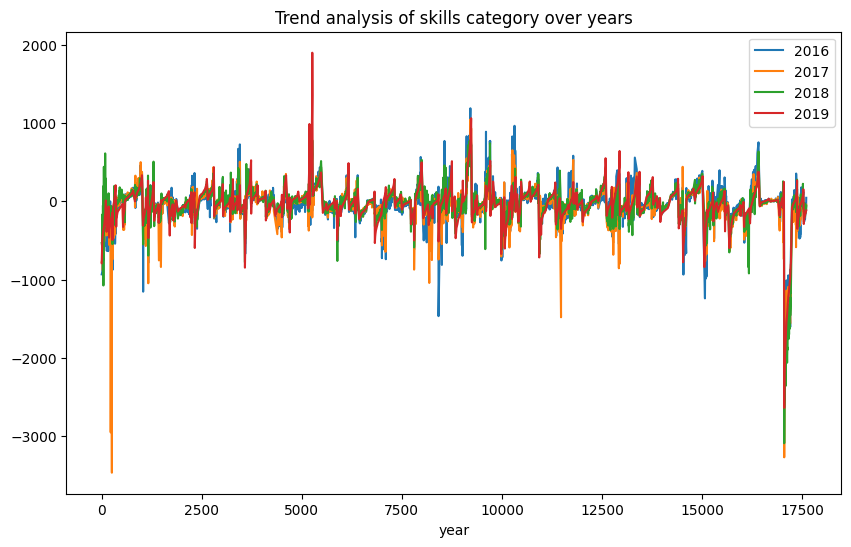

In [122]:
tech_skill = df[df['skill_group_category']=='Business Skills']
plt.figure(figsize=(10,6))
# plt.plot(tech_skill['avg_net_per_10k'],label='2015')
plt.plot(tech_skill['net_per_10K_2016'],label='2016')
plt.plot(tech_skill['net_per_10K_2017'],label='2017')
plt.plot(tech_skill['net_per_10K_2018'],label='2018')
plt.plot(tech_skill['net_per_10K_2019'],label='2019')
plt.title('Trend analysis of skills category over years')
plt.xlabel('year')
plt.legend()
plt.show()

### Insight From Above Visualisation

**Regional Trends:**

East Asia & Pacific, Europe & Central Asia, North America: These regions show positive values, indicating that skilled professionals are more likely to migrate to these areas. The positive values suggest higher chances of employment and better opportunities for skilled individuals in these regions.


North America: Particularly stands out as a region attracting a significant number of skilled individuals, reinforcing its reputation as a hub for professional opportunities.


**Income-Based Trends:**

High-Income Countries: Countries with higher income levels tend to have positive values. This indicates that skilled professionals are more likely to migrate to these countries in search of better job opportunities and living conditions.

Employment Opportunities: High-income nations are identified as prime destinations for skilled migration, underscoring the correlation between national income levels and the attractiveness of a country for skilled workers.


**Country-Specific Insights**

United States:

Predominantly Positive Values: The USA has a mix of values but mostly positive, indicating it is a major destination for skilled migrants. This aligns with its status as a global economic and technological leader.
Minimal Negative Values: The minimal negative values suggest a robust job market for skilled professionals.

India:

Predominantly Negative Values: India exhibits mostly negative values, indicating a higher outflow of skilled individuals. This suggests that many professionals are migrating abroad, possibly due to better opportunities elsewhere.



**General Trends:**

Outflow vs. Inflow: Out of 140 countries in the dataset, 90 countries exhibit negative values, indicating a net outflow of skilled professionals. Conversely, 50 countries have positive values, indicating they are destinations for skilled migration.

Migration Patterns: The data highlights a significant global movement where a larger number of countries are losing skilled professionals, while fewer countries are benefiting from this influx. This underscores global disparities in employment opportunities and economic conditions.


In [123]:
# Data visualisation on Region and Income
# in we can see East Asia & Pacific , Europe & Central Asia, North America are positive value
#  means the chances of employment is higher in that region thats why skilled people migrate to that country
# country with higher income are positive values that indicate the people migrate to that country
# Identifying high-income nations where skilled individuals relocate
# north america region is more skilled people or chances of employment is more the south asia

# afte i have some country based visulisation in that i found
# in usa have min negative value mostly positive values but in india all the negative values
# from 140 in dataset 90 country have negative value and 50 country have positive value means
# people migrate to that country


In [124]:
mean_by_country = df.groupby('country_name')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
mean_by_country.head(5)

net_per_10K_2015  net_per_10K_2016  net_per_10K_2017  \
country_name                                                         
Afghanistan        -694.542870       -538.155000       -510.329722   
Albania            -337.399559       -387.173235       -349.376912   
Algeria            -130.277312       -156.095591       -576.019032   
Angola               85.876702       -369.449894       -332.112128   
Argentina           -45.881696        -23.816082         23.737778   

              net_per_10K_2018  net_per_10K_2019  
country_name                                      
Afghanistan        -195.141019       -332.653704  
Albania            -261.745588       -305.108971  
Algeria            -226.591075       -287.414301  
Angola             -172.161170         46.086489  
Argentina            38.850058        -99.243509

In [128]:
dff = df
dff.head()

country_code country_name   wb_income   wb_region  skill_group_id  \
0           af  Afghanistan  Low income  South Asia          2549.0   
1           af  Afghanistan  Low income  South Asia          2608.0   
2           af  Afghanistan  Low income  South Asia          3806.0   
3           af  Afghanistan  Low income  South Asia         50321.0   
4           af  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category        skill_group_name  net_per_10K_2015  \
0                  Tech Skills  Information Management           -791.59   
1              Business Skills  Operational Efficiency          -1610.25   
2  Specialized Industry Skills       National Security          -1731.45   
3                  Tech Skills        Software Testing           -957.50   
4  Specialized Industry Skills                    Navy          -1510.71   

   net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  \
0           -705.88           -550.04           -680.92          -1208.79   
1           -933.55           -776.06           -532.22           -790.09   
2           -769.68           -756.59           -600.44           -767.64   
3           -828.54           -964.73           -406.50           -739.51   
4           -841.17           -842.32           -581.71           -718.64   

   avg_net_per_10k  country_net_per_10k   Status outflow_inflow_per_skill  
0         -787.444          -454.164463  Outflow                  Outflow  
1         -928.434          -454.164463  Outflow                  Outflow  
2         -925.160          -454.164463  Outflow                  Outflow  
3         -779.356          -454.164463  Outflow                  Outflow  
4         -898.910          -454.164463  Outflow                  Outflow

### Data Preparation and K-means Clustering

In [130]:
dff.drop(['country_code','skill_group_name','net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019',
         'country_net_per_10k','Status','outflow_inflow_per_skill'],axis=1,inplace=True)

In [176]:
dff.head()

country_name   wb_income   wb_region  skill_group_id  \
0  Afghanistan  Low income  South Asia          2549.0   
1  Afghanistan  Low income  South Asia          2608.0   
2  Afghanistan  Low income  South Asia          3806.0   
3  Afghanistan  Low income  South Asia         50321.0   
4  Afghanistan  Low income  South Asia          1606.0   

          skill_group_category  avg_net_per_10k  cluster  
0                  Tech Skills         -787.444       -1  
1              Business Skills         -928.434       -1  
2  Specialized Industry Skills         -925.160       -1  
3                  Tech Skills         -779.356       -1  
4  Specialized Industry Skills         -898.910       -1

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [198]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['wb_income', 'wb_region', 'skill_group_category'])


In [199]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop(columns=['country_name']))

In [206]:
# Finding the optimal number of clusters using the elbow method
sse = []
for k in range(2, 15):  # Adjust range based on your dataset
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)


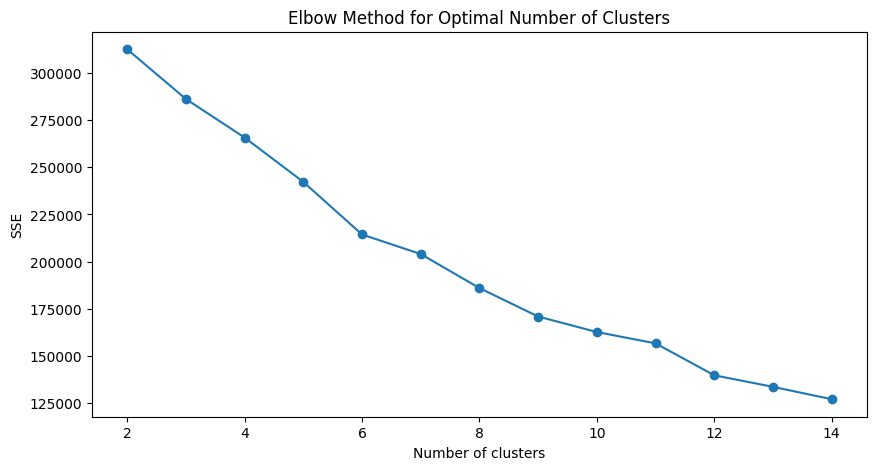

In [207]:
# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15, 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [215]:
# Choose the optimal k based on elbow method (here, let's say k=5)
optimal_k = 7

In [216]:
# Perform K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [217]:
# Evaluate K-means clustering with silhouette score
silhouette_avg_kmeans = silhouette_score(df_scaled, clusters_kmeans)
print(f"Silhouette Score (K-means): {silhouette_avg_kmeans}")


Silhouette Score (K-means): 0.27314465559594675


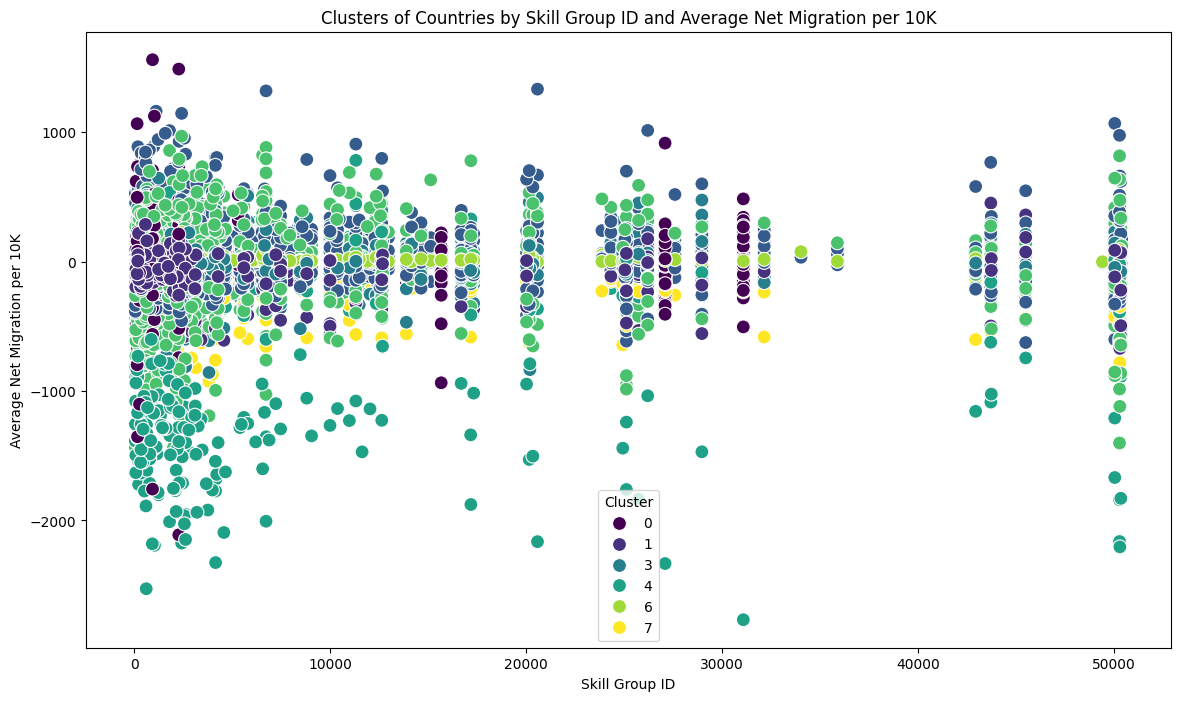

In [214]:
# Visualizing the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='skill_group_id', y='avg_net_per_10k', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Countries by Skill Group ID and Average Net Migration per 10K')
plt.xlabel('Skill Group ID')
plt.ylabel('Average Net Migration per 10K')
plt.legend(title='Cluster')
plt.show()

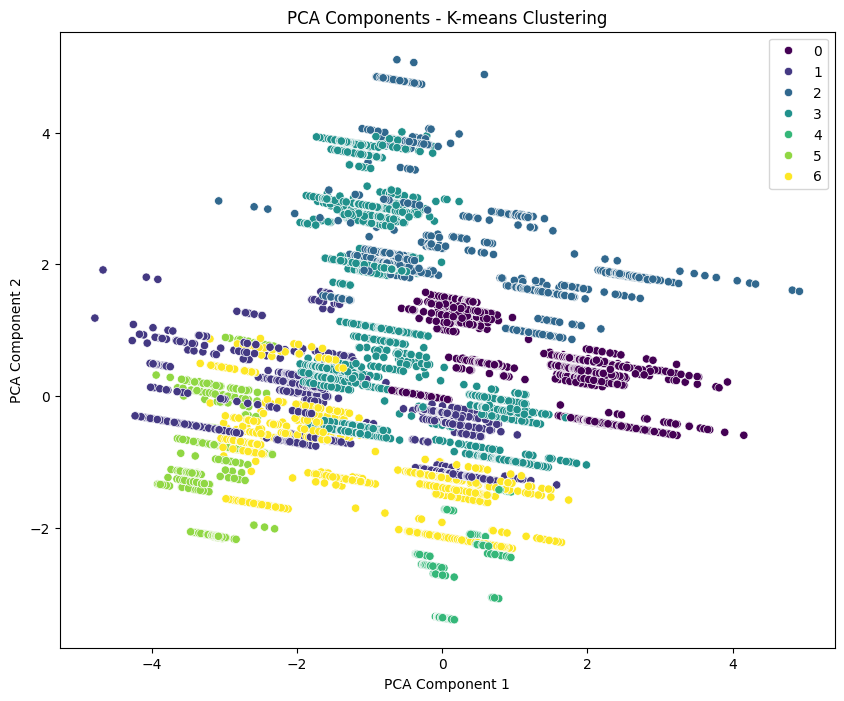

In [218]:
# Visualize K-means clusters (example using PCA for dimensionality reduction)
pca = PCA(n_components=2)
df_pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca_kmeans[:, 0], y=df_pca_kmeans[:, 1], hue=clusters_kmeans, palette='viridis', legend='full')
plt.title('PCA Components - K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [219]:
# Analyzing the clusters - excluding non-numeric columns
print(df.groupby('cluster').mean(numeric_only=True))
print(df.groupby('cluster')['country_name'].unique())

         skill_group_id  avg_net_per_10k   d_cluster
cluster                                             
0           4393.065541       -19.741142   50.483615
1           6827.262786       -52.043472   55.564744
2           6940.399829        14.625172   42.706997
3           6988.915929        17.496279   73.031342
4           6827.615021      -142.543004   69.337768
5           6837.417833       -69.412890   55.190724
6           7422.848178        43.347304  106.690283
7           6828.460571      -189.181159   52.302857
cluster
0    [Albania, Algeria, Angola, Argentina, Armenia,...
1    [Angola, Benin, Botswana, Burkina Faso, Camero...
2    [Albania, Armenia, Austria, Azerbaijan, Belaru...
3    [Australia, Cambodia, China, Fiji, Hong Kong S...
4    [Argentina, Bahamas, The, Bolivia, Brazil, Chi...
5    [Algeria, Bahrain, Egypt, Arab Rep., Iran, Isl...
6                              [Canada, United States]
7    [Afghanistan, Bangladesh, India, Nepal, Pakist...
Name: country_name, dt

In [145]:
clusters

array([6, 6, 6, ..., 1, 1, 1], dtype=int32)

### DBSCAN Clustring

In [221]:
from sklearn.cluster import DBSCAN

In [222]:
dbscan = DBSCAN(eps=0.5, min_samples=8)  # Adjust eps and min_samples as needed
# Fit DBSCAN clustering
clusters_dbscan = dbscan.fit_predict(df_scaled)


In [223]:
# Evaluate DBSCAN clustering with silhouette score
silhouette_avg_dbscan = silhouette_score(df_scaled, clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")


Silhouette Score (DBSCAN): 0.6419899959664265


In [226]:
# Add cluster labels to the original DataFrame
df['d_cluster'] = clusters_dbscan

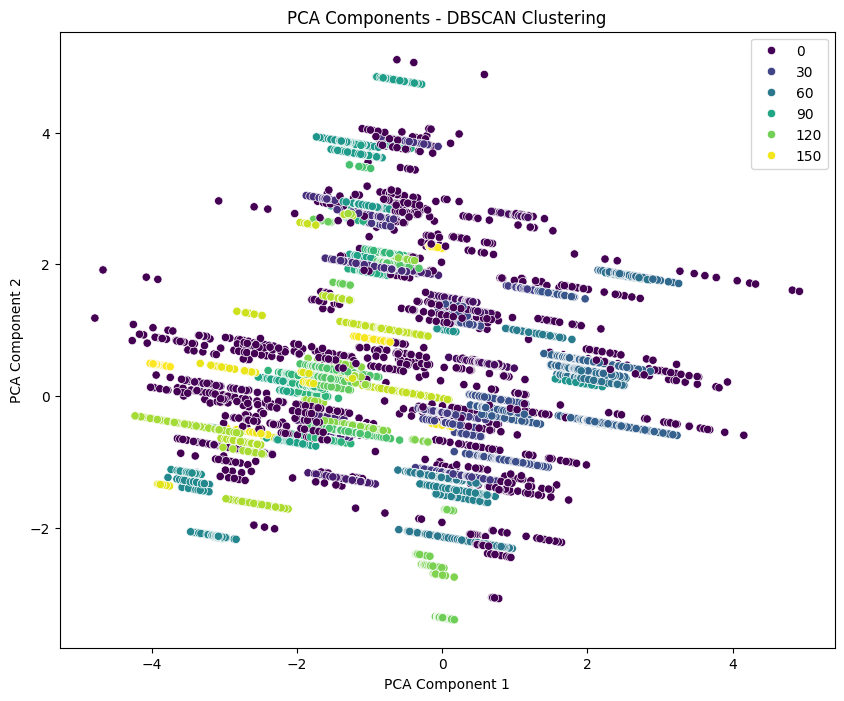

In [227]:
# Visualize DBSCAN clusters (example using PCA for dimensionality reduction)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca_kmeans[:, 0], y=df_pca_kmeans[:, 1], hue=clusters_dbscan, palette='viridis')#, legend='full')
plt.title('PCA Components - DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [230]:
# Analyze clusters (number of points in each cluster and outliers for DBSCAN)
cluster_counts_dbscan = pd.Series(clusters_dbscan).value_counts()
# outliers_dbscan = df[clusters_dbscan == -1]
print(f"Cluster counts (DBSCAN):\n{cluster_counts_dbscan}")

Cluster counts (DBSCAN):
 46     2771
-1      1223
 47      855
 36      833
 60      753
        ... 
 131       8
 143       8
 118       8
 145       8
 91        8
Name: count, Length: 155, dtype: int64


In [231]:
# Analyze clusters (number of points in each cluster)
print(df['cluster'].value_counts())

cluster
2    5860
3    2712
5    2501
4    2330
1    1838
0    1007
7     875
6     494
Name: count, dtype: int64
